# Lead Scoring Case Study
## Problem Statement
X Education, an online course provider for industry professionals, faces a challenge with a low lead conversion rate despite generating a significant number of leads daily. With only around 30% of leads resulting in conversions, the company aims to enhance efficiency by identifying 'Hot Leads'—those most likely to become paying customers. The objective is to build a lead scoring model that accurately assigns scores to leads, distinguishing high-conversion probability leads from lower ones. The target is to achieve an 80% lead conversion rate by prioritizing and focusing the sales efforts on leads with higher scores, optimizing the middle-stage lead nurturing process for increased conversions.
## Business Objective
X education wants us to help them select the most promising leads and require us to build a model that assigns a lead score between 0 to 100 for each lead.\
The CEO wants us to achieve a lead conversion rate of 80%.\
They want the model to be able to handle future constraints as well like Peak time actions required, how to utilize full man power and after achieving target what should be the approaches.
## Our Approach
We will be implementing the following steps to understand data, build a linear regression model and evaluate the model:
1. Data Preperation and EDA
    - 1.1 Reading data, Data Cleaning and Data Manipulation
    - 1.2 EDA(Exploratory Data Analysis)
3. Model Building
4. Model Evaluation


# 1. Data Preperation and EDA

## 1.1 Data Preperation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading and Understanding data
Lead_data = pd.read_csv('Leads.csv')

In [3]:
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Lead_data.shape

(9240, 37)

### Data Cleaning

In [6]:
#First Lets remove any id columns present in the data
Lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
#Dropping 'Propect ID' and 'Lead Number' as the number of unique values is equal to the number of rows in the data
data = Lead_data.drop(['Prospect ID','Lead Number'],axis=1)

In [8]:
#Lets check for percentage of null values in each column
(data.isnull().sum()/len(data))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [9]:
#Dropping columns with more than 40% null values
dropCols = data.columns[(data.isnull().sum()/len(data))*100 > 40]
data.drop(dropCols,axis=1,inplace=True)

In [10]:
#Sorting the columns based on null value %
nulls = (data.isnull().sum()/len(data))*100
nulls[nulls > 0].sort_values(ascending=False)

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [11]:
#Further lets remove more columns with more than 20% null values, except current occupation As it may provide some insights
dropCol = data.columns[(data.isnull().sum()/len(data))*100 >= 20]
dropCol = dropCol.drop(['What is your current occupation'])
data.drop(dropCol,axis=1,inplace=True)

In [12]:
nulls = (data.isnull().sum()/len(data))*100
nulls[nulls > 0].sort_values(ascending=False)

What is your current occupation    29.112554
Specialization                     15.562771
City                               15.367965
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Lead Source                         0.389610
dtype: float64

In [13]:
#Lets look into current occupation column
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [14]:
#Lets impute null values with Other category as the occupation is unknown
#And imputing the nulls with mode will make the column highly skewed
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan,'Other')
data['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [15]:
#Lets look into Specialization column
data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
#Here 'Select' is s good as null since there was no selection for specialization.
#And assuming that Specialization is an insightful column lets combine null,select values and replace it with 'Other'.
data['Specialization'] = data['Specialization'].replace(np.nan, 'Other')
data['Specialization'] = data['Specialization'].replace('Select','Other')
print('nulls in Specialization column: ',data['Specialization'].isnull().sum())
data['Specialization'].value_counts(normalize=True)*100

nulls in Specialization column:  0


Other                                36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [17]:
#Lets look into city column
data['City'].value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [18]:
#Lets look at nulls percentage after converting 'Select' to null since it represents the same empty value
data['City'] = data['City'].replace('Select',np.nan)
data['City'].isnull().sum()/len(data)*100

39.70779220779221

In [19]:
#Lets drop the column as almost 40% data is missing
data.drop('City',axis=1,inplace=True)

In [20]:
nulls = (data.isnull().sum()/len(data))*100
nulls[nulls > 0].sort_values(ascending=False)

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

In [21]:
#Lets look into the columns with very few null values
data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [22]:
data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [23]:
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [24]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [25]:
#for colums 'Total Visits' and 'Page Views Per Visit' lets impute the missing values with median
data['TotalVisits'] = data['TotalVisits'].fillna(data['TotalVisits'].median())
data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median())
#for columns 'Last Activity' and 'Lead Source' Lets impute the missing values with mode
data['Last Activity'] = data['Last Activity'].fillna('Email Opened')
data['Lead Source'] = data['Lead Source'].fillna('Google')

In [26]:
data.isnull().sum().sum()

0

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

## 1.2 Exploratory Data Analysis

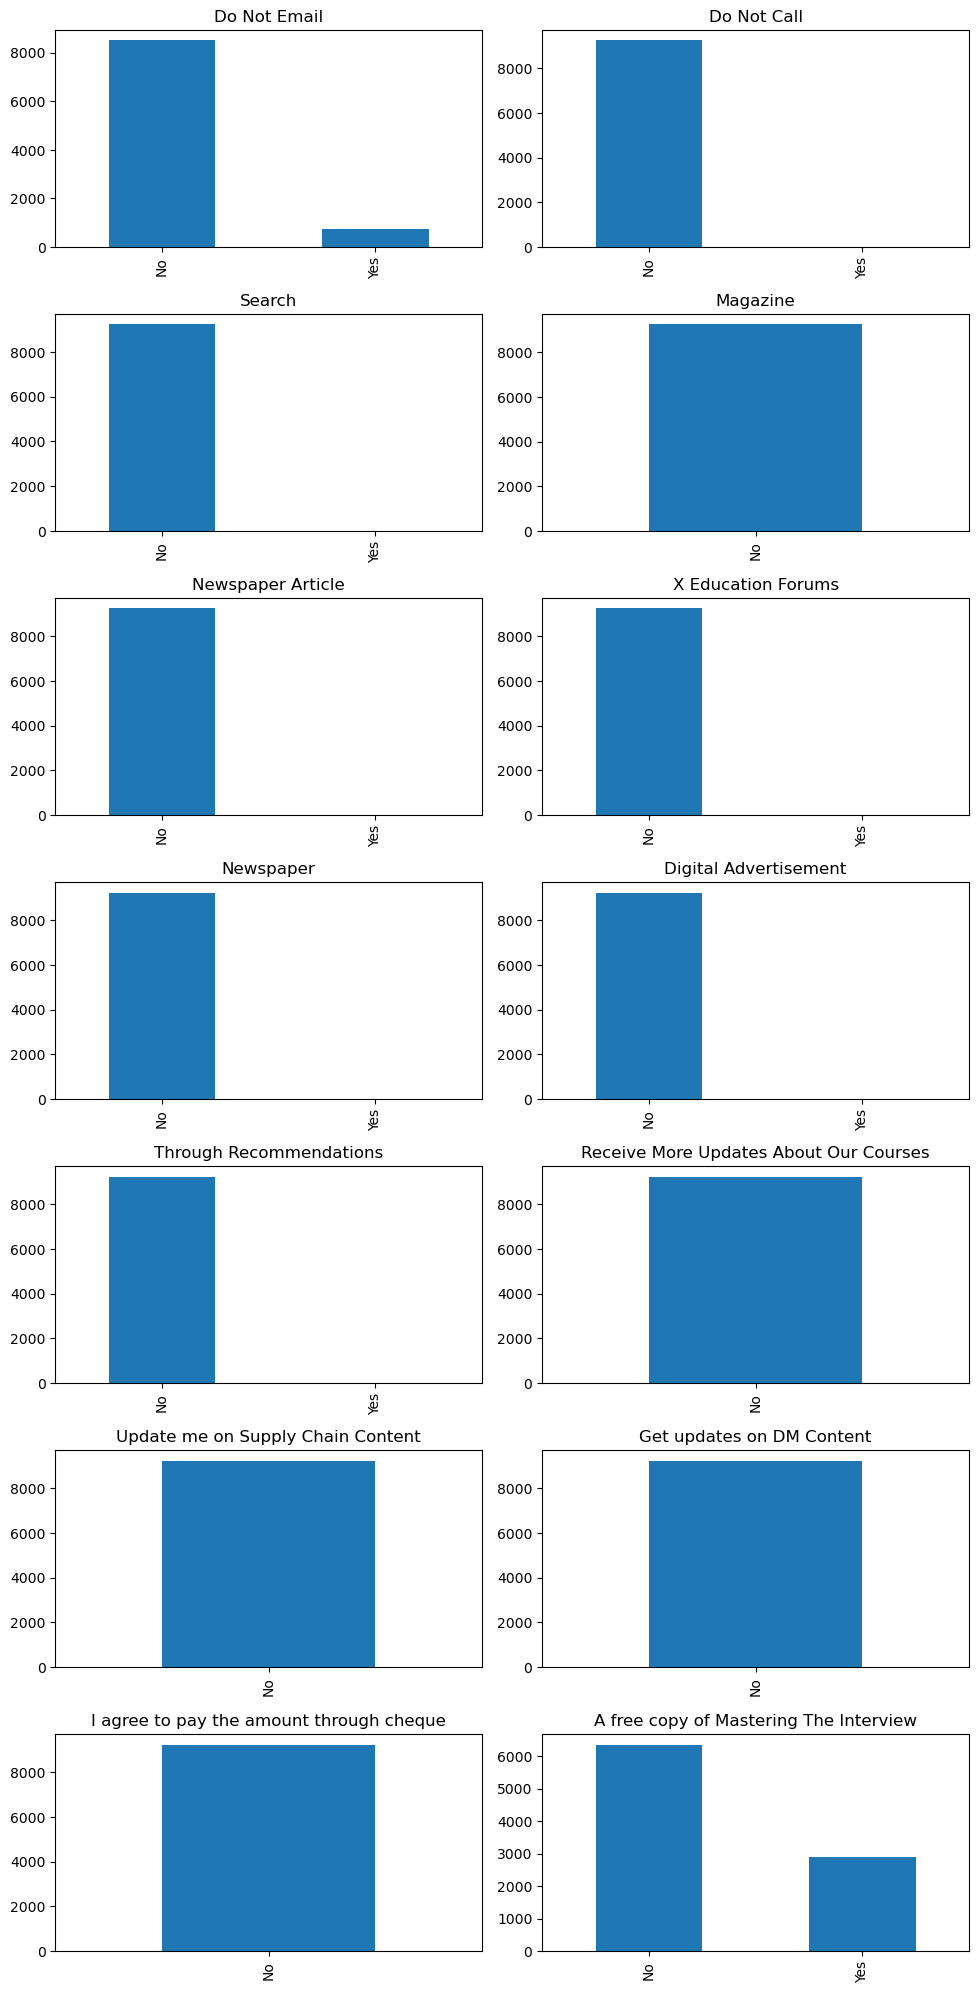

In [28]:
#Analyzing non numeric columns to find the distribution of values in each column
#Analyzing 'Yes' and 'No' columns
cat_cols = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
plt.figure(figsize=(10,20))
for i in range(len(cat_cols)):
    plt.subplot(7,2,i+1)
    plt.tight_layout()
    data[cat_cols[i]].value_counts().plot.bar()
    plt.title(cat_cols[i])

**Insights:**
1. Majority of Leads have opted out of communication through email and call
2. Majority of the Leads have not seen any ads.
3. None of the Leads agree to pay the amount through cheque
4. About 30% of Leads want a free copy of mastering the interview while the others don't.

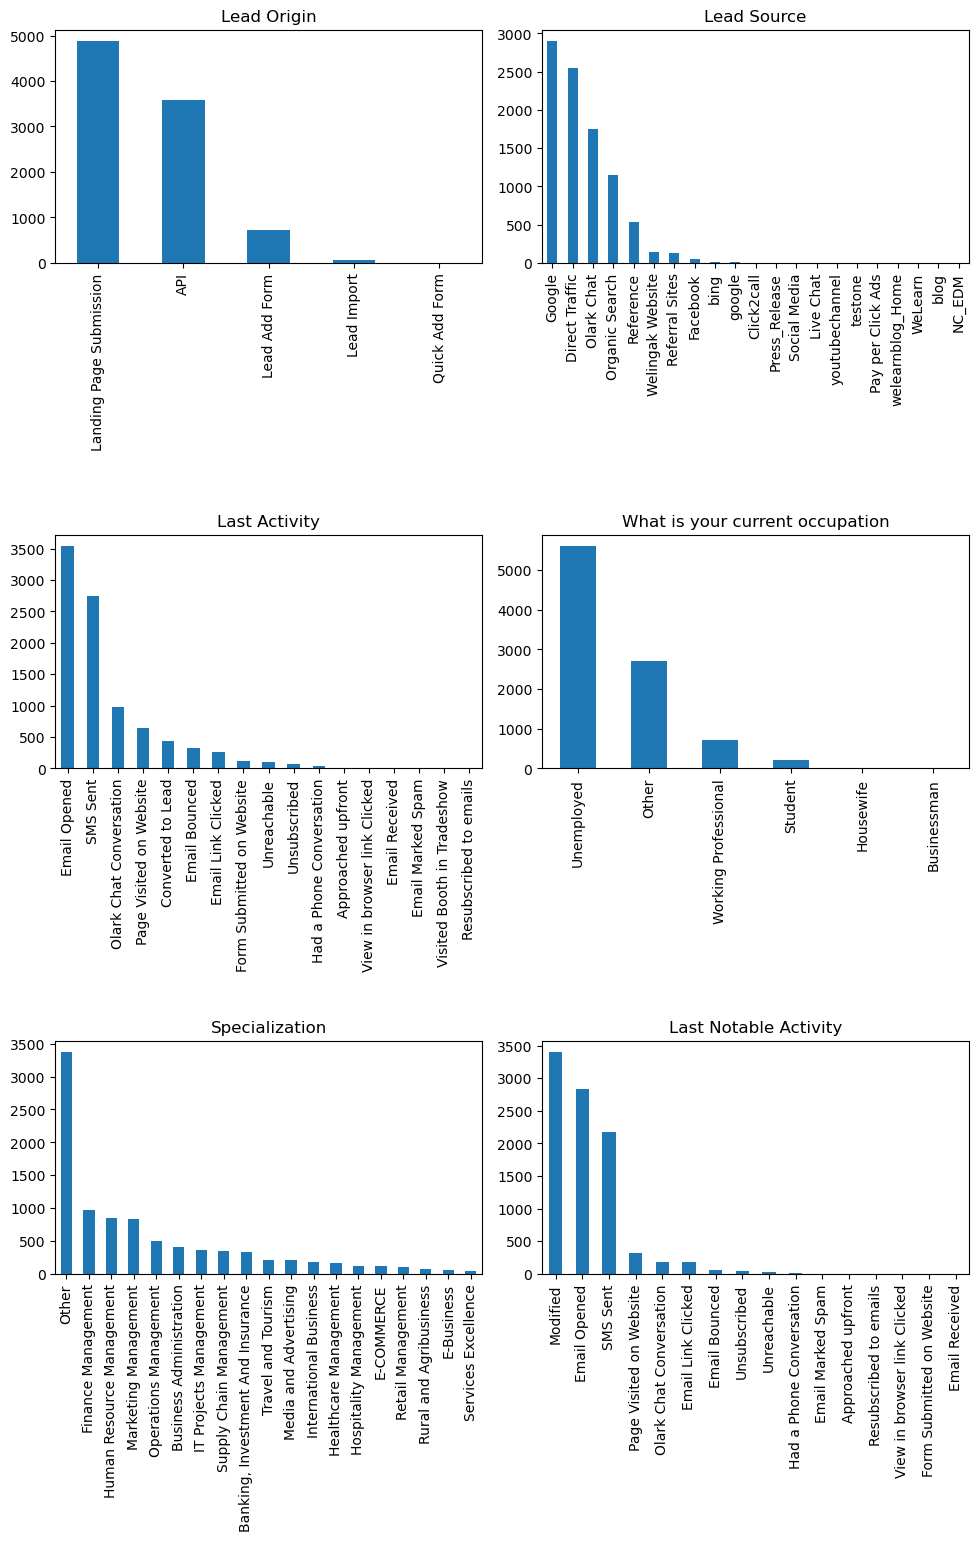

In [29]:
#Analyzing columns with multiple categories
cat_cols = ['Lead Origin','Lead Source','Last Activity','What is your current occupation','Specialization','Last Notable Activity']
plt.figure(figsize=(10,18))
for i in range(len(cat_cols)):
    plt.subplot(4,2,i+1)
    plt.tight_layout()
    data[cat_cols[i]].value_counts().plot.bar()
    plt.title(cat_cols[i])

**Insights:**
1. Most of the leads are from Google follwed by Direct traffic in second and Olark chat in third.
2. Maximum leads were identified through Landing page submission.
3. Majority of Leads have done Other specializations followed by Financial Management and HR management.
4. Majority of Leads are Unemployed.

In [30]:
#Also in Column 'Lead Source', google should be replaced with Google
data['Lead Source'] = data['Lead Source'].replace('google','Google')

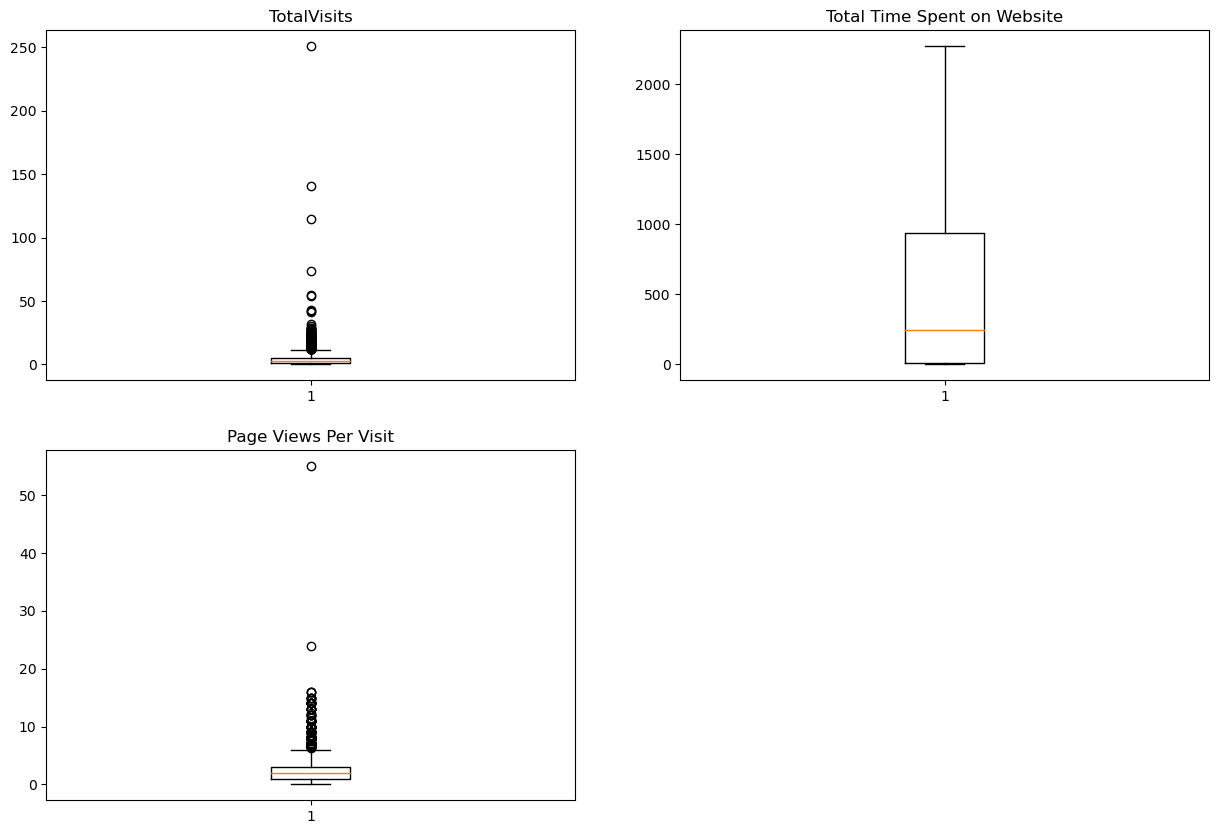

In [31]:
#checking outliers on numeric columns
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    plt.boxplot(data[cols[i]])
    plt.title(cols[i])

In [32]:
#Lets handle outliers in 'TotalVisits' and 'Page Views Per Visit'
data['TotalVisits'].describe(percentiles=(0.25,0.5,0.75,0.85,0.95,0.99))

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
85%         6.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

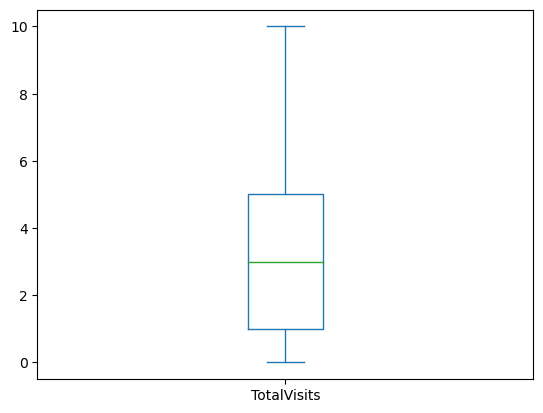

In [33]:
#Lets keep only 95 percentile values and impute values above that with the 95th percentile value.
data['TotalVisits'][data['TotalVisits'] >= 10] = 10
data['TotalVisits'].plot.box()

In [34]:
data['Page Views Per Visit'].describe(percentiles=(0.25,0.5,0.75,0.85,0.95,0.99))

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
85%         4.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

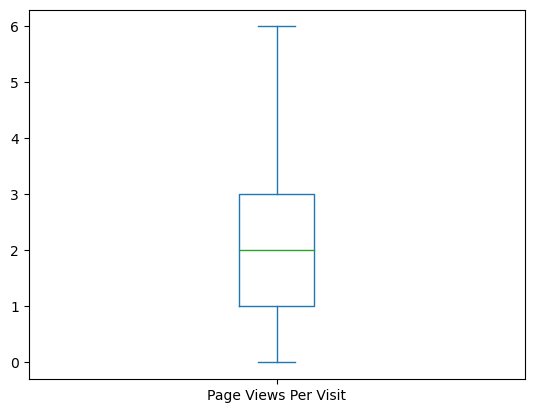

In [35]:
#Lets do the same for Page Views Per Visit
data['Page Views Per Visit'][data['Page Views Per Visit'] >= 6] = 6
data['Page Views Per Visit'].plot.box()

<Axes: ylabel='Converted'>

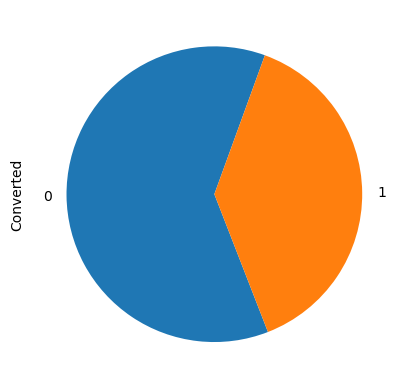

In [36]:
#Analyzing columns with respect to 'Converted'(Target) column
data['Converted'].value_counts().plot.pie(startangle=70)

**About 40% of Leads are converted**

In [37]:
#Function for count plot to compare distribution of converted and non converted leads for each column value
def bar(col):
    sns.countplot(data = data, x = col,hue = 'Converted')
    plt.xticks(rotation=90)
    plt.title(col)

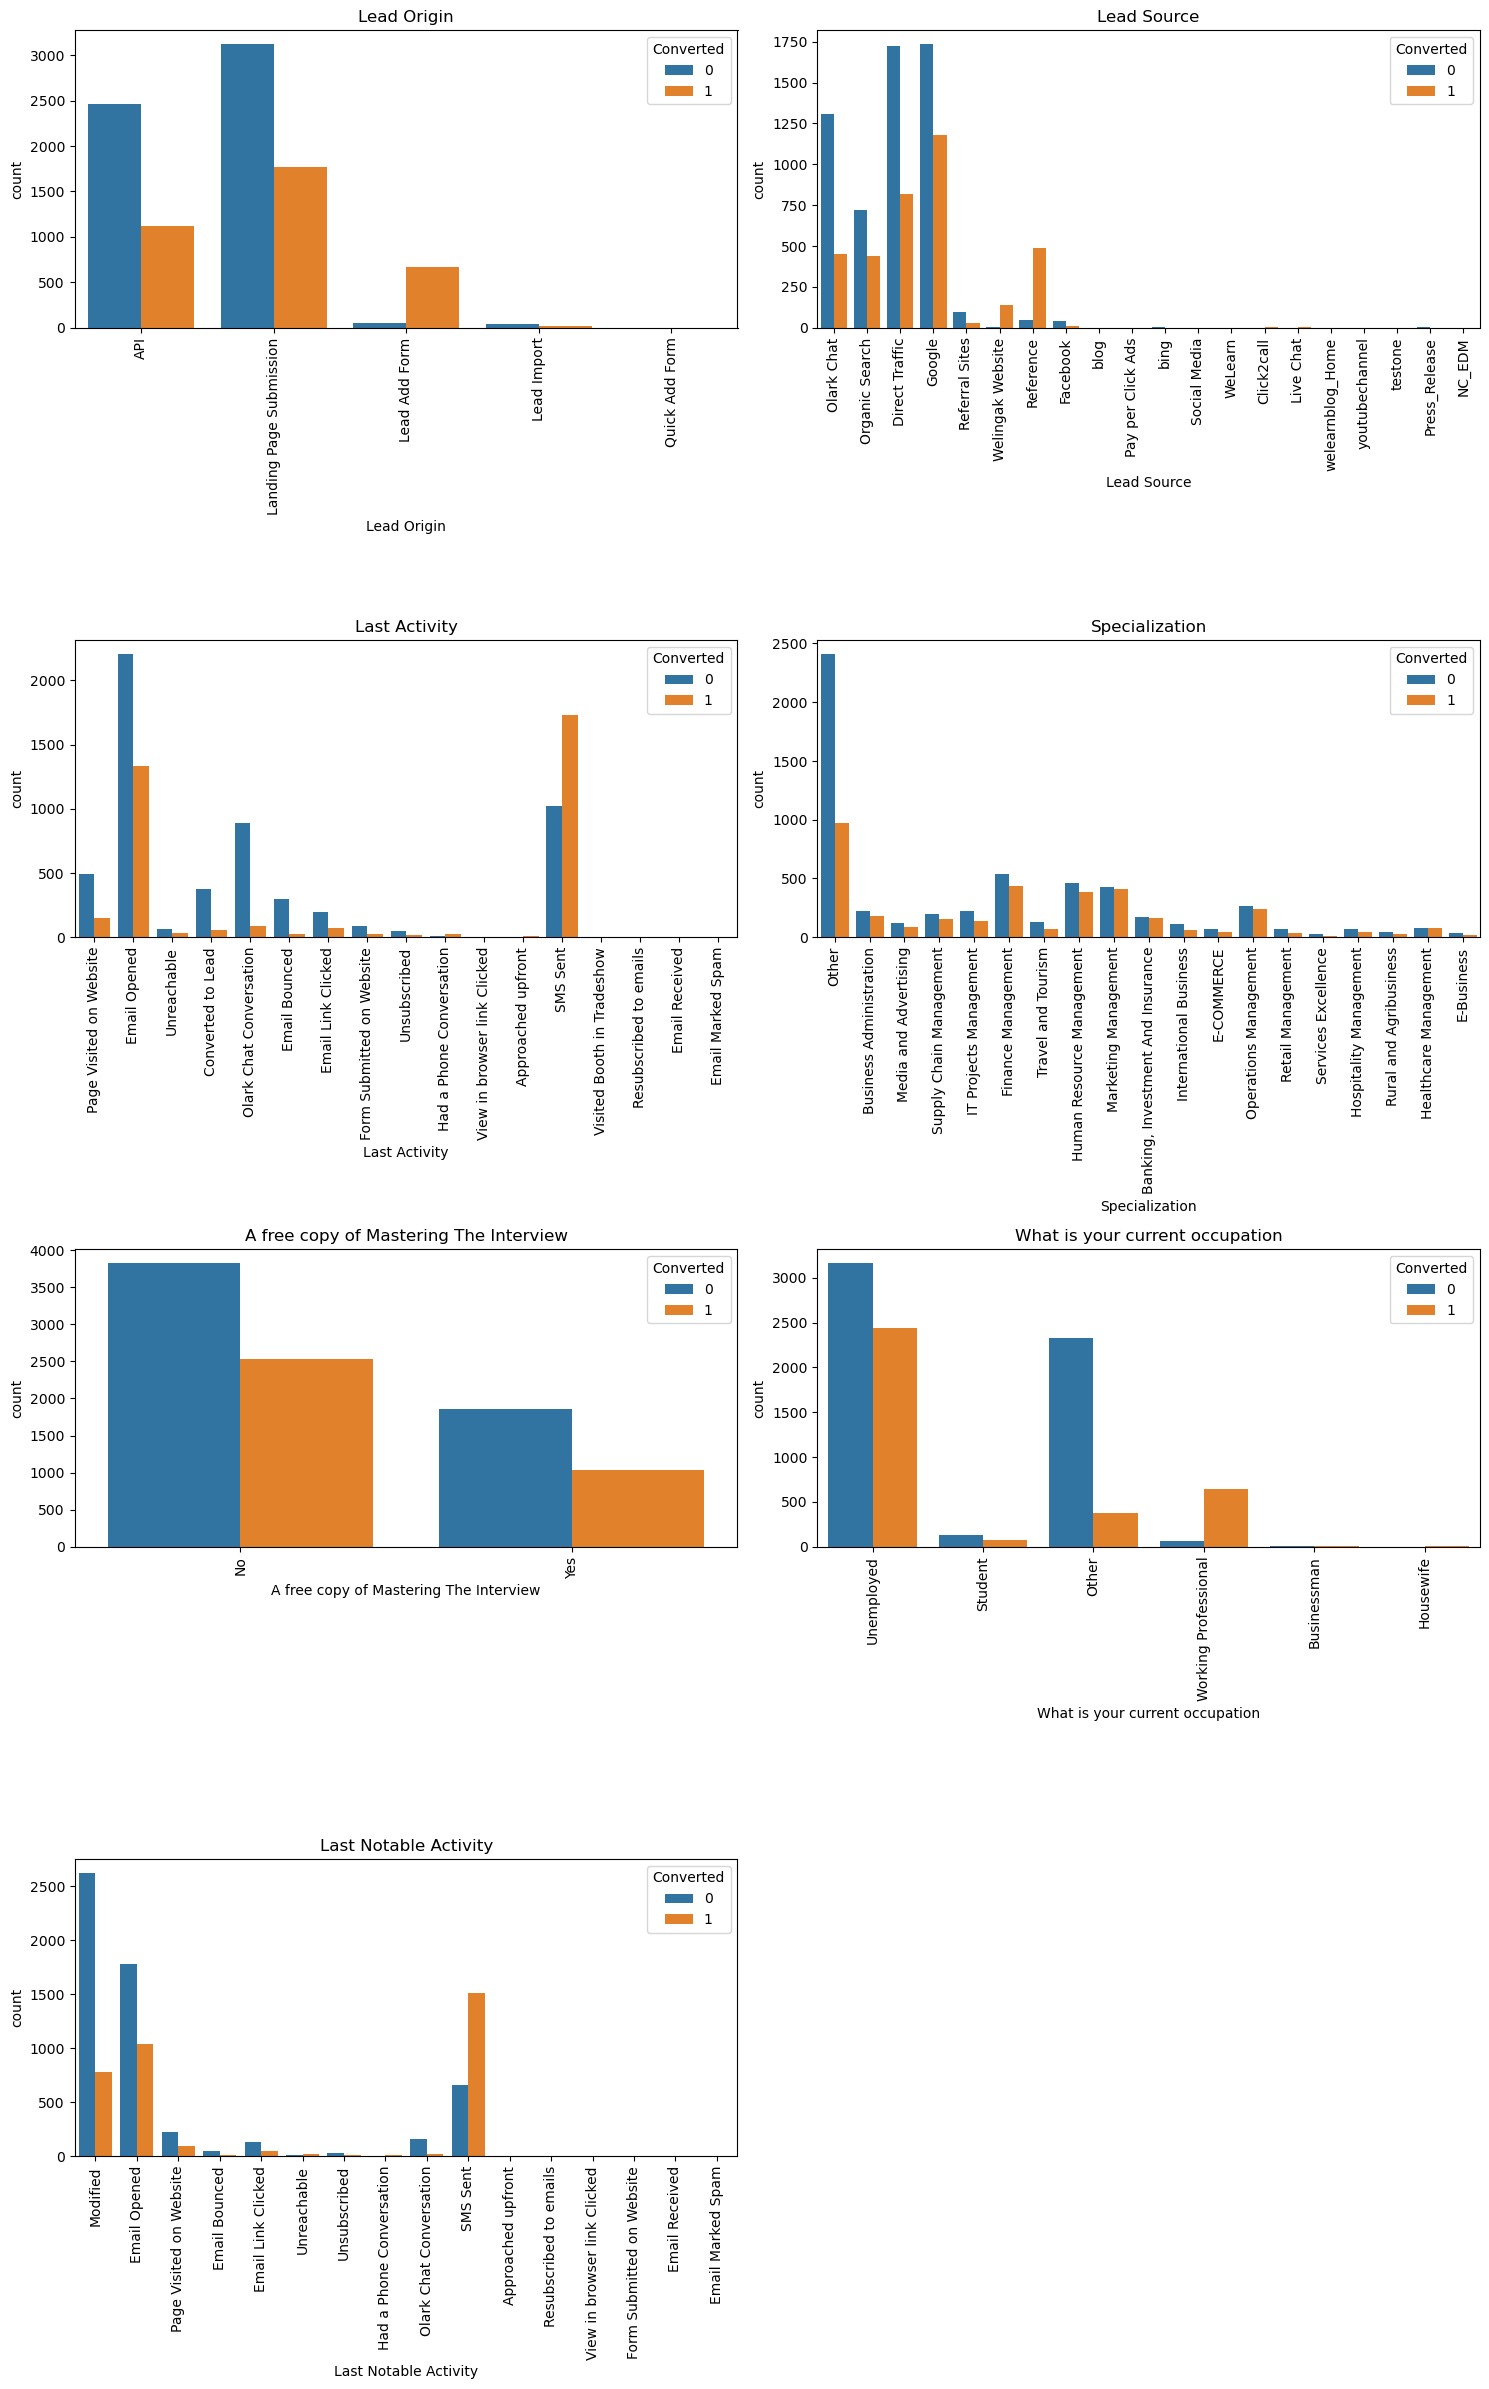

In [38]:
cols = ['Lead Origin','Lead Source','Last Activity','Specialization','A free copy of Mastering The Interview','What is your current occupation','Last Notable Activity']
plt.figure(figsize=(15,22))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    plt.tight_layout()
    bar(cols[i])

**Insights:**
1. Majority Leads from referrals are more likely to get converted than leads from other sources
2. Most working professionals get converted.
3. Leads from Lead add form conversion rate is the highest.
4. Leads whose Last Notable Activity is 'Modified' have low conversion rate.

<Axes: >

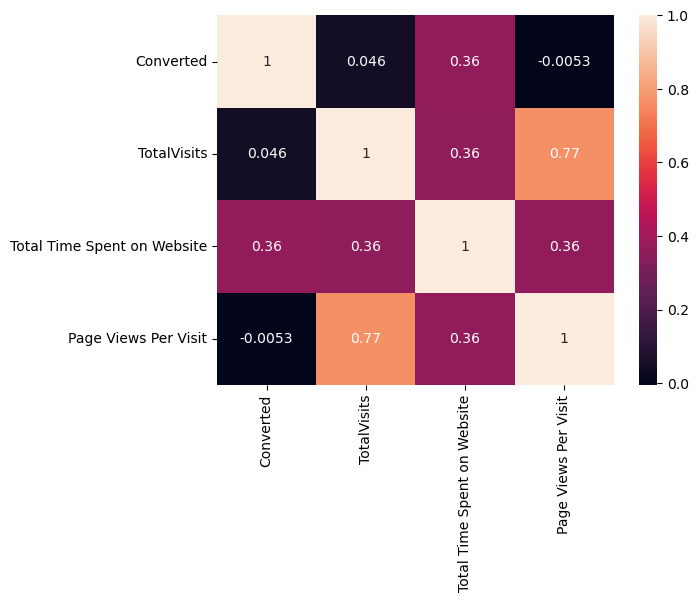

In [39]:
sns.heatmap(data.corr(),annot=True)

* There is correlation between TotalVisits and Page Views Per Visit

**From the above analysis we found that few columns are highly skewed, and will not contribute much to the model, hence removing those columns**

In [40]:
#Removing higly skewed columns
dropCols = ['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
data.drop(dropCols,axis=1,inplace=True)

In [41]:
#Converting Yes, No column values to 1 and 0
data['Do Not Email'] = data['Do Not Email'].replace(['Yes','No'],[1,0])
data['A free copy of Mastering The Interview'] = data['A free copy of Mastering The Interview'].replace(['Yes','No'],[1,0])

In [42]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,0,Modified


**Before building the model lets create dummy variables for categorical columns**

In [43]:
#Creating dummy variables for categorical columns
dummy_cols = ['Lead Origin','Lead Source','Specialization','Last Activity','What is your current occupation','Last Notable Activity']
dummy_df = pd.get_dummies(data[dummy_cols],drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
data = pd.concat([data, dummy_df],axis=1)
data.drop(dummy_cols,axis=1,inplace=True)

In [45]:
data.info('All')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

In [46]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
df_train, df_test = train_test_split(data, train_size=0.7,random_state=100)

In [49]:
print('Train data shape: ',df_train.shape)
print('Test data shape:  ',df_test.shape)

Train data shape:  (6468, 83)
Test data shape:   (2772, 83)


In [50]:
y_train = df_train.pop('Converted')
X_train = df_train

In [51]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,4.0,487,1.33,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3516,0,5.0,106,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,5.0,1230,5.00,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scale_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

In [55]:
X_train[scale_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.468000e+03,6.468000e+03,6.468000e+03
mean,-5.108262e-17,-6.701161e-17,-6.893407e-17
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-1.149699e+00,-8.853708e-01,-1.266675e+00
25%,-7.873438e-01,-8.634138e-01,-7.025878e-01
50%,-6.263344e-02,-4.352528e-01,-1.385005e-01
75%,6.620769e-01,8.098906e-01,4.255868e-01
max,2.473853e+00,3.271816e+00,2.117849e+00


# 2. Model Building

In [56]:
X_train.info('All')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6468 non-null   int64  
 1   TotalVisits                                           6468 non-null   float64
 2   Total Time Spent on Website                           6468 non-null   float64
 3   Page Views Per Visit                                  6468 non-null   float64
 4   A free copy of Mastering The Interview                6468 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 7   Lead Origin_Lead Import                               6468 non-null   uint8  
 8   Lead Origin_Quick Add Form                            6

**There are 82 columns and manually eliminating columns one by one will be a lengthy process.\
Lets use RFE to get 20 best features and then use manual method to optimize the model**

In [57]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [58]:
#Using rfe to get 20 best features
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [59]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False])

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 30),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Origin_Quick Add Form', False, 36),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 42),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_blog', Fals

In [61]:
cols = X_train.columns[rfe.support_]

In [62]:
#Defining functions for building model, checking the multicollinearity(VIF)
def buildModel(X):
    X_train_sm = sm.add_constant(X)
    lm = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
    return lm
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Model 1

In [63]:
#Lets start building the model and optimizing it
X = X_train[cols]
model1 = buildModel(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.2
Date:                Tue, 21 Nov 2023   Deviance:                       5140.4
Time:                        18:03:59   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4141
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0158      0.128     -0.123      0.902      -0.268       0.236
Do Not Email                                            -1.1920      0.169     -7.066      0.000      -1.523      -0.861
Total Time Spent on Website                              1.0771      0.040     26.791      0.000       0.998       1.156
Lead Origin_Landing Page Submission                     -1.0609      0.130     -8.182      0.000      -1.315      -0.807
Lead Origin_Lead Add Form                                2.9246      0.204     14.312      0.000       2.524       3.325
Lead Source_NC_EDM                                      23.7800   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.0748      0.124      8.653      0.000       0.831       1.318
Lead Source_Welingak Website                             2.3397      0.745      3.142      0.002       0.880       3.799
Specialization_Hospitality Management                   -0.9627      0.331     -2.911      0.004      -1.611      -0.314
Specialization_Other                                    -0.9720      0.125     -7.785      0.000      -1.217      -0.727
Last Activity_Had a Phone Conversation                   1.1008      0.969      1.136      0.256      -0.799       3.001
Last Activity_Olark Chat Conversation                   -0.7694      0.177     -4.352      0.000      -1.116      -0.423
Last Activity_Resubscribed to emails                    12.2256   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   1.2565      0.076     16.632      0.000       1.108       1.405
What is your current occupation_Housewife               22.8767   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Other                   -1.0185      0.088    -11.523      0.000      -1.192      -0.845
What is your current occupation_Working Professional     2.4245      0.192     12.627      0.000       2.048       2.801
Last Notable Activity_Had a Phone Conversation           2.2064      1.483      1.487      0.137      -0.701       5.114
Last Notable Activity_Modified                          -0.7950      0.083     -9.601      0.000      -0.957      -0.633
Last Notable Activity_Resubscribed to emails            12.2256   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Notable Activity_Unreachable                        1.6893      0.547      3.089      0.002       0.618       2.761
========================================================================================================================
"""

In [64]:
VIF(X)

,Features,VIF
18,Last Notable Activity_Resubscribed to emails,inf
11,Last Activity_Resubscribed to emails,inf
8,Specialization_Other,2.33
5,Lead Source_Olark Chat,2.05
9,Last Activity_Had a Phone Conversation,2.02
16,Last Notable Activity_Had a Phone Conversation,2.01
2,Lead Origin_Landing Page Submission,1.85
17,Last Notable Activity_Modified,1.82
14,What is your current occupation_Other,1.63
10,Last Activity_Olark Chat Conversation,1.59


#### Model 2
- Removing column 'Lead Source_NC_EDM' due to high p-value

In [65]:
cols = cols.drop('Lead Source_NC_EDM')

In [66]:
X = X_train[cols]
model2 = buildModel(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.7
Date:                Tue, 21 Nov 2023   Deviance:                       5143.3
Time:                        18:03:59   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4138
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0153      0.128     -0.119      0.905      -0.267       0.236
Do Not Email                                            -1.1927      0.169     -7.072      0.000      -1.523      -0.862
Total Time Spent on Website                              1.0774      0.040     26.801      0.000       0.999       1.156
Lead Origin_Landing Page Submission                     -1.0595      0.130     -8.173      0.000      -1.314      -0.805
Lead Origin_Lead Add Form                                2.9262      0.204     14.320      0.000       2.526       3.327
Lead Source_Olark Chat                                   1.0747      0.124      8.653      0.000       0.831       1.318
Lead Source_Welingak Website                             2.3400      0.745      3.142      0.002       0.880       3.800
Specialization_Hospitality Management                   -0.9641      0.331     -2.915      0.004      -1.612      -0.316
Specialization_Other                                    -0.9729      0.125     -7.792      0.000      -1.218      -0.728
Last Activity_Had a Phone Conversation                   1.1003      0.969      1.135      0.256      -0.800       3.000
Last Activity_Olark Chat Conversation                   -0.7698      0.177     -4.354      0.000      -1.116      -0.423
Last Activity_Resubscribed to emails                    12.2235   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   1.2547      0.076     16.613      0.000       1.107       1.403
What is your current occupation_Housewife               22.8755   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Other                   -1.0136      0.088    -11.482      0.000      -1.187      -0.841
What is your current occupation_Working Professional     2.4240      0.192     12.624      0.000       2.048       2.800
Last Notable Activity_Had a Phone Conversation           2.2041      1.483      1.486      0.137      -0.703       5.111
Last Notable Activity_Modified                          -0.7967      0.083     -9.625      0.000      -0.959      -0.634
Last Notable Activity_Resubscribed to emails            12.2235   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Notable Activity_Unreachable                        1.6862      0.547      3.085      0.002       0.615       2.758
========================================================================================================================
"""

In [67]:
VIF(X)

,Features,VIF
17,Last Notable Activity_Resubscribed to emails,inf
10,Last Activity_Resubscribed to emails,inf
7,Specialization_Other,2.33
4,Lead Source_Olark Chat,2.05
8,Last Activity_Had a Phone Conversation,2.02
15,Last Notable Activity_Had a Phone Conversation,2.01
2,Lead Origin_Landing Page Submission,1.85
16,Last Notable Activity_Modified,1.82
13,What is your current occupation_Other,1.63
9,Last Activity_Olark Chat Conversation,1.59


#### Model 3
- Removing column 'Last Activity_Resubscribed to emails' due to high p-value

In [68]:
cols = cols.drop('Last Activity_Resubscribed to emails')

In [69]:
X = X_train[cols]
model3 = buildModel(X)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.7
Date:                Tue, 21 Nov 2023   Deviance:                       5143.3
Time:                        18:04:00   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4138
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0153      0.128     -0.119      0.905      -0.267       0.236
Do Not Email                                            -1.1927      0.169     -7.072      0.000      -1.523      -0.862
Total Time Spent on Website                              1.0774      0.040     26.801      0.000       0.999       1.156
Lead Origin_Landing Page Submission                     -1.0595      0.130     -8.173      0.000      -1.314      -0.805
Lead Origin_Lead Add Form                                2.9262      0.204     14.320      0.000       2.526       3.327
Lead Source_Olark Chat                                   1.0747      0.124      8.653      0.000       0.831       1.318
Lead Source_Welingak Website                             2.3400      0.745      3.142      0.002       0.880       3.800
Specialization_Hospitality Management                   -0.9641      0.331     -2.915      0.004      -1.612      -0.316
Specialization_Other                                    -0.9729      0.125     -7.792      0.000      -1.218      -0.728
Last Activity_Had a Phone Conversation                   1.1003      0.969      1.135      0.256      -0.800       3.000
Last Activity_Olark Chat Conversation                   -0.7698      0.177     -4.354      0.000      -1.116      -0.423
Last Activity_SMS Sent                                   1.2547      0.076     16.613      0.000       1.107       1.403
What is your current occupation_Housewife               22.8755   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Other                   -1.0136      0.088    -11.482      0.000      -1.187      -0.841
What is your current occupation_Working Professional     2.4240      0.192     12.624      0.000       2.048       2.800
Last Notable Activity_Had a Phone Conversation           2.2041      1.483      1.486      0.137      -0.703       5.111
Last Notable Activity_Modified                          -0.7967      0.083     -9.625      0.000      -0.959      -0.634
Last Notable Activity_Resubscribed to emails            24.4470   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_Unreachable                        1.6862      0.547      3.085      0.002       0.615       2.758
========================================================================================================================
"""

In [70]:
VIF(X)

,Features,VIF
7,Specialization_Other,2.33
4,Lead Source_Olark Chat,2.05
8,Last Activity_Had a Phone Conversation,2.02
14,Last Notable Activity_Had a Phone Conversation,2.01
2,Lead Origin_Landing Page Submission,1.85
15,Last Notable Activity_Modified,1.82
12,What is your current occupation_Other,1.63
9,Last Activity_Olark Chat Conversation,1.59
10,Last Activity_SMS Sent,1.55
3,Lead Origin_Lead Add Form,1.51


#### Model 4
- Removing column 'Last Notable Activity_Resubscribed to emails' due to high p-value

In [71]:
cols = cols.drop('Last Notable Activity_Resubscribed to emails')

In [72]:
X = X_train[cols]
model4 = buildModel(X)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.7
Date:                Tue, 21 Nov 2023   Deviance:                       5147.4
Time:                        18:04:00   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4135
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0162      0.128     -0.126      0.899      -0.268       0.235
Do Not Email                                            -1.1933      0.169     -7.076      0.000      -1.524      -0.863
Total Time Spent on Website                              1.0771      0.040     26.799      0.000       0.998       1.156
Lead Origin_Landing Page Submission                     -1.0581      0.130     -8.163      0.000      -1.312      -0.804
Lead Origin_Lead Add Form                                2.9275      0.204     14.327      0.000       2.527       3.328
Lead Source_Olark Chat                                   1.0801      0.124      8.702      0.000       0.837       1.323
Lead Source_Welingak Website                             2.3392      0.745      3.141      0.002       0.880       3.799
Specialization_Hospitality Management                   -0.9638      0.331     -2.915      0.004      -1.612      -0.316
Specialization_Other                                    -0.9711      0.125     -7.778      0.000      -1.216      -0.726
Last Activity_Had a Phone Conversation                   1.1004      0.969      1.135      0.256      -0.799       3.000
Last Activity_Olark Chat Conversation                   -0.7744      0.177     -4.383      0.000      -1.121      -0.428
Last Activity_SMS Sent                                   1.2527      0.075     16.594      0.000       1.105       1.401
What is your current occupation_Housewife               22.8757   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Other                   -1.0090      0.088    -11.445      0.000      -1.182      -0.836
What is your current occupation_Working Professional     2.4245      0.192     12.627      0.000       2.048       2.801
Last Notable Activity_Had a Phone Conversation           2.2023      1.483      1.485      0.138      -0.704       5.109
Last Notable Activity_Modified                          -0.7982      0.083     -9.646      0.000      -0.960      -0.636
Last Notable Activity_Unreachable                        1.6833      0.546      3.081      0.002       0.612       2.754
========================================================================================================================
"""

In [73]:
VIF(X)

,Features,VIF
7,Specialization_Other,2.33
4,Lead Source_Olark Chat,2.05
8,Last Activity_Had a Phone Conversation,2.02
14,Last Notable Activity_Had a Phone Conversation,2.01
2,Lead Origin_Landing Page Submission,1.85
15,Last Notable Activity_Modified,1.82
12,What is your current occupation_Other,1.63
9,Last Activity_Olark Chat Conversation,1.59
10,Last Activity_SMS Sent,1.55
3,Lead Origin_Lead Add Form,1.51


#### Model 5
- Removing 'What is your current occupation_Housewife' due to high p-value

In [74]:
cols = cols.drop('What is your current occupation_Housewife')

In [75]:
X = X_train[cols]
model5 = buildModel(X)
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.7
Date:                Tue, 21 Nov 2023   Deviance:                       5161.4
Time:                        18:04:00   Pearson chi2:                 7.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0106      0.128     -0.082      0.934      -0.262       0.241
Do Not Email                                            -1.1997      0.169     -7.117      0.000      -1.530      -0.869
Total Time Spent on Website                              1.0759      0.040     26.805      0.000       0.997       1.155
Lead Origin_Landing Page Submission                     -1.0526      0.129     -8.128      0.000      -1.306      -0.799
Lead Origin_Lead Add Form                                2.9416      0.204     14.415      0.000       2.542       3.342
Lead Source_Olark Chat                                   1.0799      0.124      8.705      0.000       0.837       1.323
Lead Source_Welingak Website                             2.3239      0.745      3.121      0.002       0.864       3.783
Specialization_Hospitality Management                   -0.9708      0.331     -2.937      0.003      -1.619      -0.323
Specialization_Other                                    -0.9744      0.125     -7.811      0.000      -1.219      -0.730
Last Activity_Had a Phone Conversation                   1.0895      0.969      1.124      0.261      -0.810       2.989
Last Activity_Olark Chat Conversation                   -0.7805      0.177     -4.418      0.000      -1.127      -0.434
Last Activity_SMS Sent                                   1.2448      0.075     16.507      0.000       1.097       1.393
What is your current occupation_Other                   -1.0137      0.088    -11.507      0.000      -1.186      -0.841
What is your current occupation_Working Professional     2.4152      0.192     12.586      0.000       2.039       2.791
Last Notable Activity_Had a Phone Conversation           2.2036      1.483      1.486      0.137      -0.703       5.110
Last Notable Activity_Modified                          -0.7925      0.083     -9.599      0.000      -0.954      -0.631
Last Notable Activity_Unreachable                        1.6768      0.547      3.068      0.002       0.606       2.748
========================================================================================================================
"""

In [76]:
VIF(X)

,Features,VIF
7,Specialization_Other,2.33
4,Lead Source_Olark Chat,2.05
8,Last Activity_Had a Phone Conversation,2.02
13,Last Notable Activity_Had a Phone Conversation,2.01
2,Lead Origin_Landing Page Submission,1.85
14,Last Notable Activity_Modified,1.82
11,What is your current occupation_Other,1.63
9,Last Activity_Olark Chat Conversation,1.59
10,Last Activity_SMS Sent,1.55
3,Lead Origin_Lead Add Form,1.50


#### Model 6
- Removing 'Last Activity_Had a Phone Conversation' due to high p-value

In [77]:
cols = cols.drop('Last Activity_Had a Phone Conversation')

In [78]:
X = X_train[cols]
model6 = buildModel(X)
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.4
Date:                Tue, 21 Nov 2023   Deviance:                       5162.7
Time:                        18:04:00   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4121
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0102      0.128     -0.079      0.937      -0.262       0.241
Do Not Email                                            -1.2012      0.169     -7.123      0.000      -1.532      -0.871
Total Time Spent on Website                              1.0768      0.040     26.830      0.000       0.998       1.155
Lead Origin_Landing Page Submission                     -1.0527      0.129     -8.129      0.000      -1.306      -0.799
Lead Origin_Lead Add Form                                2.9449      0.204     14.432      0.000       2.545       3.345
Lead Source_Olark Chat                                   1.0791      0.124      8.701      0.000       0.836       1.322
Lead Source_Welingak Website                             2.3187      0.745      3.114      0.002       0.859       3.778
Specialization_Hospitality Management                   -0.9734      0.331     -2.944      0.003      -1.621      -0.325
Specialization_Other                                    -0.9732      0.125     -7.803      0.000      -1.218      -0.729
Last Activity_Olark Chat Conversation                   -0.7852      0.177     -4.446      0.000      -1.131      -0.439
Last Activity_SMS Sent                                   1.2430      0.075     16.485      0.000       1.095       1.391
What is your current occupation_Other                   -1.0142      0.088    -11.514      0.000      -1.187      -0.842
What is your current occupation_Working Professional     2.4219      0.192     12.631      0.000       2.046       2.798
Last Notable Activity_Had a Phone Conversation           3.2932      1.123      2.933      0.003       1.093       5.494
Last Notable Activity_Modified                          -0.7868      0.082     -9.552      0.000      -0.948      -0.625
Last Notable Activity_Unreachable                        1.6766      0.547      3.067      0.002       0.605       2.748
========================================================================================================================
"""

In [79]:
VIF(X)

,Features,VIF
7,Specialization_Other,2.33
4,Lead Source_Olark Chat,2.05
2,Lead Origin_Landing Page Submission,1.85
13,Last Notable Activity_Modified,1.81
10,What is your current occupation_Other,1.63
8,Last Activity_Olark Chat Conversation,1.59
9,Last Activity_SMS Sent,1.54
3,Lead Origin_Lead Add Form,1.50
5,Lead Source_Welingak Website,1.27
1,Total Time Spent on Website,1.24


#### Model 7
- Removing 'Specialization_Other', keeping VIF threshold to 2

In [80]:
cols = cols.drop('Specialization_Other')

In [81]:
X = X_train[cols]
model7 = buildModel(X)
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.6
Date:                Tue, 21 Nov 2023   Deviance:                       5225.3
Time:                        18:04:02   Pearson chi2:                 6.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7321      0.088     -8.326      0.000      -0.904      -0.560
Do Not Email                                            -1.2282      0.168     -7.314      0.000      -1.557      -0.899
Total Time Spent on Website                              1.0982      0.040     27.463      0.000       1.020       1.177
Lead Origin_Landing Page Submission                     -0.3387      0.090     -3.776      0.000      -0.514      -0.163
Lead Origin_Lead Add Form                                3.2702      0.201     16.308      0.000       2.877       3.663
Lead Source_Olark Chat                                   1.0547      0.121      8.716      0.000       0.818       1.292
Lead Source_Welingak Website                             1.8304      0.742      2.468      0.014       0.377       3.284
Specialization_Hospitality Management                   -0.8175      0.327     -2.503      0.012      -1.458      -0.177
Last Activity_Olark Chat Conversation                   -0.8449      0.173     -4.898      0.000      -1.183      -0.507
Last Activity_SMS Sent                                   1.2096      0.075     16.143      0.000       1.063       1.356
What is your current occupation_Other                   -1.0971      0.087    -12.590      0.000      -1.268      -0.926
What is your current occupation_Working Professional     2.5532      0.188     13.591      0.000       2.185       2.921
Last Notable Activity_Had a Phone Conversation           3.4410      1.115      3.085      0.002       1.255       5.627
Last Notable Activity_Modified                          -0.7803      0.082     -9.564      0.000      -0.940      -0.620
Last Notable Activity_Unreachable                        1.7912      0.538      3.332      0.001       0.738       2.845
========================================================================================================================
"""

In [82]:
VIF(X)

,Features,VIF
2,Lead Origin_Landing Page Submission,1.74
4,Lead Source_Olark Chat,1.71
12,Last Notable Activity_Modified,1.71
7,Last Activity_Olark Chat Conversation,1.56
9,What is your current occupation_Other,1.51
3,Lead Origin_Lead Add Form,1.49
8,Last Activity_SMS Sent,1.45
1,Total Time Spent on Website,1.24
5,Lead Source_Welingak Website,1.24
10,What is your current occupation_Working Profes...,1.18


**Both p-values and VIF are in the acceptable range for model7, so lets evaluate the model**

In [84]:
#Lets find the priority of the variables
model7.params.abs().sort_values(ascending=False)

Last Notable Activity_Had a Phone Conversation          3.441015
Lead Origin_Lead Add Form                               3.270185
What is your current occupation_Working Professional    2.553248
Lead Source_Welingak Website                            1.830376
Last Notable Activity_Unreachable                       1.791169
Do Not Email                                            1.228197
Last Activity_SMS Sent                                  1.209581
Total Time Spent on Website                             1.098244
What is your current occupation_Other                   1.097101
Lead Source_Olark Chat                                  1.054746
Last Activity_Olark Chat Conversation                   0.844920
Specialization_Hospitality Management                   0.817475
Last Notable Activity_Modified                          0.780262
const                                                   0.732133
Lead Origin_Landing Page Submission                     0.338667
dtype: float64

# 3. Model Evaluation

In [85]:
#Now we have our final model with p-values and VIF within the recommended range
#Lets now find the optimal threshold for classification


#Find optimal Threshold
def thresh(y):
    threshold = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in threshold:
        y[i] = y.Converted_prob.map(lambda x: 1 if x > i else 0)
    cutoff = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
    for i in threshold:
        confusion = metrics.confusion_matrix(y.Converted,y[i])
        total = sum(sum(confusion))
        acc = (confusion[0,0] + confusion[1,1])/total
        speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
        sensi = confusion[1,1]/(confusion[1,1]+confusion[1,0])
        cutoff.loc[i] = [i,acc,sensi,speci]
    sns.set_style('whitegrid')
    cutoff.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
    plt.xticks(np.arange(0,1,step=0.05))
    plt.xticks(rotation=90)
    

#Confusion Matrix and accuracy
def evaluate(y):
    confusion = metrics.confusion_matrix(y.Converted,y.predicted)
    plt.figure(figsize=(5,3))
    sns.heatmap(confusion,annot=True,fmt='g',xticklabels=['Not Converted','Converted'],yticklabels=['Not Converted','Converted']).set(xlabel='Predicted',ylabel='Actual')
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0]
    print('accuracy:    ',metrics.accuracy_score(y.Converted,y.predicted))
    print('recall:      ',metrics.recall_score(y.Converted,y.predicted))
    print('precision:   ',metrics.precision_score(y.Converted,y.predicted))
    print('f1_score:    ',metrics.f1_score(y.Converted,y.predicted))
    print('Sensitivity: ',TP / float(TP+FN))
    print('Specificity: ',TN / float(TN+FP))

In [86]:
from sklearn import metrics

In [87]:
X_sm = sm.add_constant(X_train[cols])
y_train_pred = model7.predict(X_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

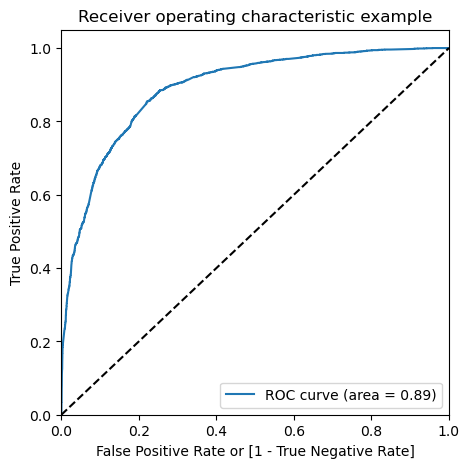

In [88]:
def draw_roc(actual,prob):
    fpr, tpr, thresholds = metrics.roc_curve( actual, prob,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, prob )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

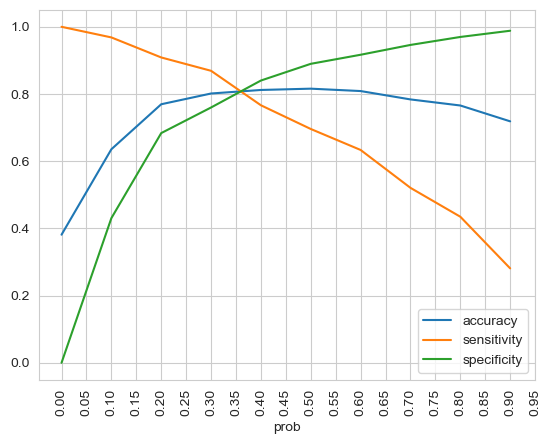

In [89]:
thresh(y_train_pred_final)

accuracy:     0.8113790970933829
recall:       0.813463098134631
precision:    0.725234996384671
f1_score:     0.7668195718654435
Sensitivity:  0.813463098134631
Specificity:  0.8100949525237381


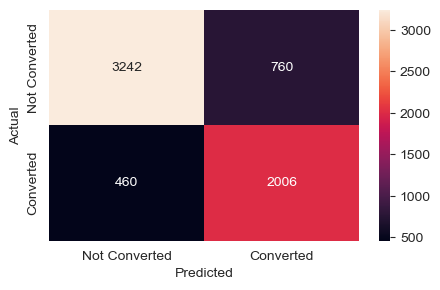

In [90]:
#From the above plot, the intersection of all three lines gives the threshold which is approx 0.35.
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
evaluate(y_train_pred_final)

In [91]:
from sklearn.metrics import precision_recall_curve

In [92]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

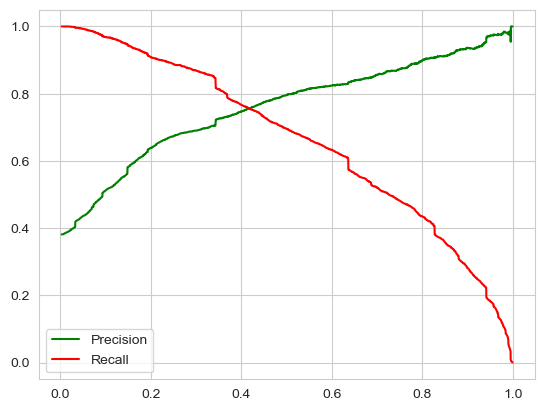

In [93]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['Precision','Recall'])
plt.show()

### Making Predictions on the test data

In [94]:
y_test = df_test.pop('Converted')
X_test = df_test

In [95]:
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [96]:
X = X_test[cols]
X_test_sm = sm.add_constant(X)

In [97]:
y_test_pred = model7.predict(X_test_sm)
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
y_test_pred.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)
y_test_pred_final = pd.concat([y_test_df,y_test_pred],axis=1)
y_test_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.608166
1,1,2376,0.941325
2,1,7766,0.940391
3,0,9199,0.093221
4,1,4359,0.827170


In [98]:
y_test_pred_final = y_test_pred_final.rename(columns={0 : 'Converted_prob'})
y_test_pred_final['predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final[['LeadID','Converted_prob','Converted','predicted']].head()

,LeadID,Converted_prob,Converted,predicted
0,4269,0.608166,1,1
1,2376,0.941325,1,1
2,7766,0.940391,1,1
3,9199,0.093221,0,0
4,4359,0.827170,1,1


accuracy:     0.8167388167388168
recall:       0.8118721461187215
precision:    0.746431570109152
f1_score:     0.7777777777777778
Sensitivity:  0.8118721461187215
Specificity:  0.8199165175909362


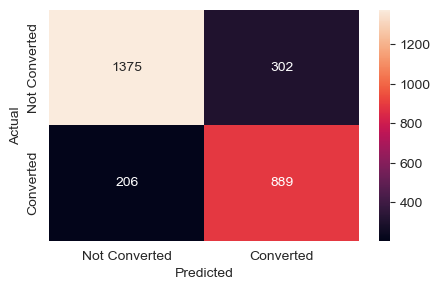

In [99]:
evaluate(y_test_pred_final)

In [100]:
#Adding a Lead_score, so that the company can prioratise calls based on it
y_test_pred_final['Lead Score'] = round((y_test_pred_final['Converted_prob']*100),0).astype(int)

In [101]:
#Sorting based on Lead Score
y_test_pred_final[['LeadID','Converted_prob','Converted','predicted','Lead Score']].sort_values(by='Converted_prob',ascending=False)

,LeadID,Converted_prob,Converted,predicted,Lead Score
1091,818,0.999307,1,1,100
546,3478,0.998805,1,1,100
745,6383,0.998739,1,1,100
835,4613,0.998370,1,1,100
1026,5671,0.998219,1,1,100
...,...,...,...,...,...
2443,9173,0.006418,0,0,1
2415,6669,0.006057,0,0,1
1488,4249,0.006045,0,0,1
796,6934,0.005961,0,0,1


In [102]:
#Adding Lead Number to indentify the Lead
y_test_pred_final['Lead Number'] = Lead_data['Lead Number']
y_test_pred_final[['LeadID','Lead Number','Lead Score','predicted']].head()

,LeadID,Lead Number,Lead Score,predicted
0,4269,660737,61,1
1,2376,660728,94,1
2,7766,660727,94,1
3,9199,660719,9,0
4,4359,660681,83,1


## Summary

The final equation for the Linear regression model is:\
\
Converted_Probability = **-0.7321** + (Do Not Email × **-1.2282**) + (Total Time Spent on Website × **1.0982**) + (Lead Origin_Landing Page Submission × **-0.3387**) + (Lead Origin_Lead Add Form × **3.2702**) + (Lead Source_Olark Chat × **1.0547**) + (Lead Source_Welingak Website × **1.8304**) + (Specialization_Hospitality Management × **-0.8175**) + (Last Activity_Olark Chat Conversation × **-0.8449**) + (Last Activity_SMS Sent × **1.2096**) + (What is your current occupation_Other × **-1.0971**) + (What is your current occupation_Working Professional × **2.5532**) + (Last Notable Activity_Had a Phone Conversation × **3.4410**) + (Last Notable Activity_Modified × **-0.7803**) + (Last Notable Activity_Unreachable × **1.7912**)\
\
Lead_Score of a Lead mainly depends on the following features in the order of priority:
1. Last Notable Activity_Had a Phone Conversation
2. Lead Origin_Lead Add Form
3. What is your current occupation_Working Professional
4. Lead Source_Welingak Website
5. Last Notable Activity_Unreachable
6. Do Not Email
7. Last Activity_SMS Sent
8. Total Time Spent on Website
9. What is your current occupation_Other
10. Lead Source_Olark Chat
11. Last Activity_Olark Chat Conversation
12. Specialization_Hospitality Management
13. Last Notable Activity_Modified
14. Lead Origin_Landing Page Submission

**Based on the conversion probability a Lead Score between 0 to 100 is generated for each lead. Higher the Lead Score, higher the chances of getting converted**

The Evaluation Metrics for the model are:\
\
**Train Data:**
* accuracy   :  81.1%
* recall     :  81.3%
* precision  :  72.5%
* f1_score   :  76.6%
* Sensitivity:  81.3%
* Specificity:  81.0%

**Test Data:**
* accuracy   :  81.6%
* recall     :  81.2%
* precision  :  74.6%
* f1_score   :  77.7%
* Sensitivity:  81.2%
* Specificity:  81.9%